# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\abusa\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Import Dataset

In [2]:
df = pd.read_csv('C:/Users/abusa/Desktop/datasheet/Heart diseases predicton/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,NaN,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1,1,106,0,1.9,1,3,2,0


# Feature Scaling

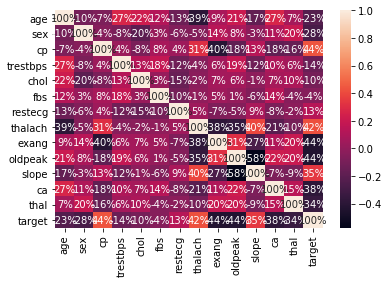

In [4]:
import seaborn as sns
sns.heatmap(df.corr(),fmt='.0%',annot=True)

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,explorative=True)

In [6]:
profile

In [7]:
profile.to_file('Heart.html')

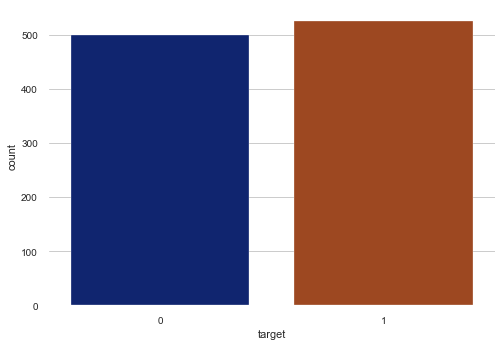

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='dark')

# Data Preprocessing

In [9]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [10]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0.0,cp_1.0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

# KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

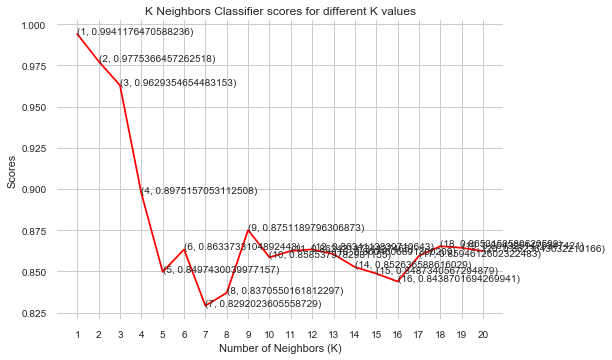

In [13]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [15]:
score.mean()

0.8634113839710643

# RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [18]:
score.mean()

0.9921758994860079